In [ ]:
import os
import time
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import timm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import torch.nn.functional as F
from PIL import Image
import cv2
import random
from sklearn.model_selection import train_test_split
import torch.nn.utils.prune as prune
import json
import zipfile
from google.colab import drive
import gc

drive.mount('/content/drive')

with zipfile.ZipFile("/content/drive/MyDrive/Yeni WinRAR ZIP arşivi2.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

Mounted at /content/drive


In [ ]:
#[np.int64(20), np.int64(22), np.int64(56), np.int64(64), np.int64(65), np.int64(78), np.int64(89), np.int64(96), np.int64(97), np.int64(104), np.int64(147), np.int64(216), np.int64(265), np.int64(267), np.int64(270), np.int64(274), np.int64(285), np.int64(294), np.int64(295), np.int64(311), np.int64(323), np.int64(341), np.int64(370), np.int64(376), np.int64(392), np.int64(403), np.int64(406), np.int64(410), np.int64(420), np.int64(425), np.int64(441), np.int64(450), np.int64(456), np.int64(461), np.int64(487), np.int64(496), np.int64(497), np.int64(499), np.int64(507), np.int64(510)]
#[np.int64(22), np.int64(35), np.int64(42), np.int64(44), np.int64(45), np.int64(46), np.int64(62), np.int64(66), np.int64(80), np.int64(82), np.int64(84), np.int64(85), np.int64(87), np.int64(88), np.int64(97), np.int64(148), np.int64(159), np.int64(190), np.int64(197), np.int64(210), np.int64(226), np.int64(229), np.int64(230), np.int64(253), np.int64(262), np.int64(263), np.int64(275), np.int64(293), np.int64(308), np.int64(324), np.int64(335), np.int64(365), np.int64(375), np.int64(394), np.int64(403), np.int64(435), np.int64(438), np.int64(442), np.int64(454), np.int64(455), np.int64(460), np.int64(471), np.int64(506)]
#[np.int64(1), np.int64(56), np.int64(58), np.int64(143), np.int64(412), np.int64(419), np.int64(494), np.int64(516), np.int64(527), np.int64(542), np.int64(559), np.int64(603), np.int64(625), np.int64(646), np.int64(649), np.int64(650), np.int64(754), np.int64(860), np.int64(903), np.int64(991), np.int64(1096), np.int64(1156), np.int64(1238), np.int64(1261), np.int64(1277), np.int64(1306), np.int64(1374), np.int64(1412), np.int64(1609), np.int64(1619), np.int64(1637), np.int64(1691), np.int64(1711), np.int64(1715), np.int64(1719), np.int64(1727), np.int64(1741), np.int64(1743), np.int64(1777), np.int64(1813), np.int64(1850), np.int64(1870), np.int64(1958), np.int64(1976), np.int64(2007)]


important_channels_combined = []

bir teorim var onu deniyorum, acaba epoch = 1 yapsam nasıl değişir

Epoch [1/3]  Train Loss: 0.3055  Val Loss: 0.0858  Time: 34.39s
Epoch [2/3]  Train Loss: 0.0851  Val Loss: 0.0562  Time: 34.54s
Epoch [3/3]  Train Loss: 0.0681  Val Loss: 0.0609  Time: 34.63s


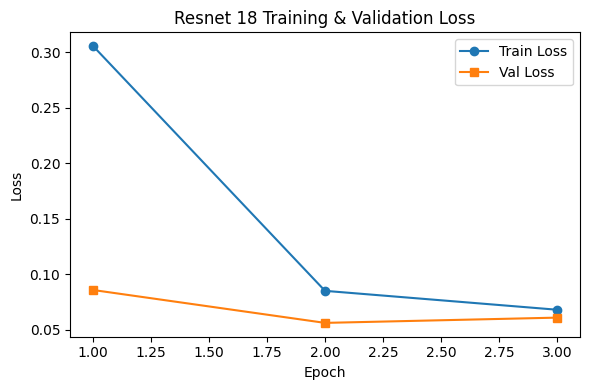


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9635,1.0000,0.9814,211.0
Tomato___Early_blight,0.9400,0.9495,0.9447,99.0
Tomato___Late_blight,1.0000,0.8730,0.9322,189.0
Tomato___Leaf_Mold,0.9800,0.9899,0.9849,99.0
Tomato___Septoria_leaf_spot,0.9831,1.0000,0.9915,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9011,0.9880,0.9425,166.0
Tomato___Target_Spot,0.9783,0.9712,0.9747,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.0000,0.9962,0.9981,531.0
Tomato___Tomato_mosaic_virus,1.0000,0.9798,0.9898,99.0
Tomato___healthy,0.9936,0.9936,0.9936,157.0



✅ Genel Accuracy: 0.9780


<ipython-input-6-608913554>:188: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


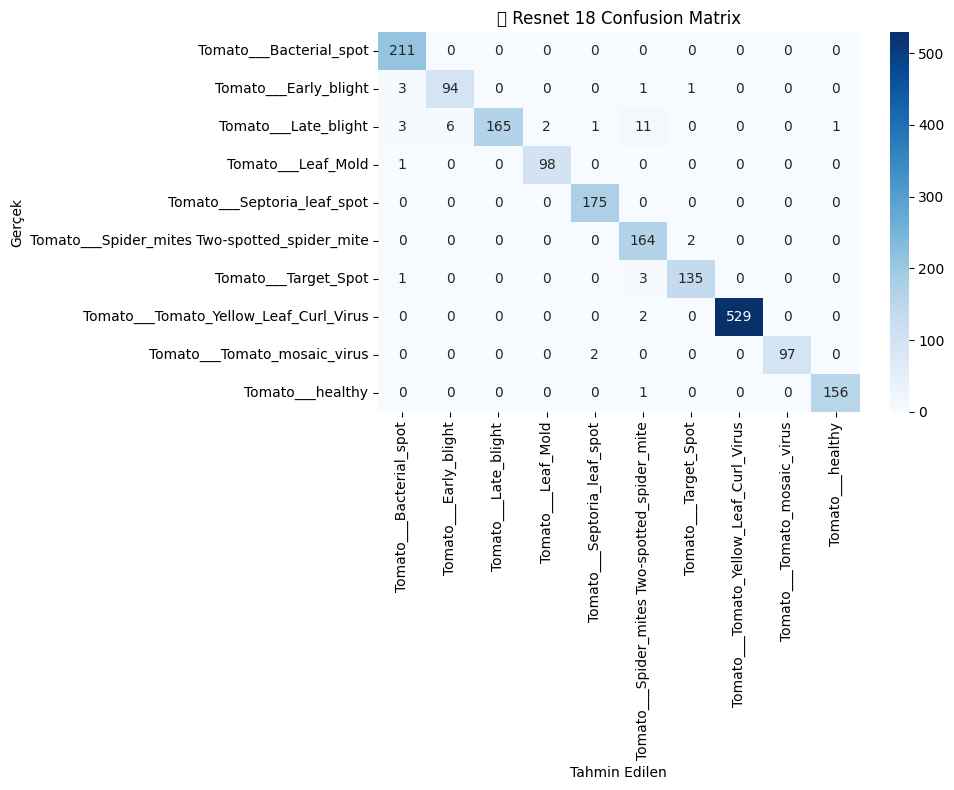

Epoch [1/3]  Train Loss: 0.3148  Val Loss: 0.0926  Time: 34.56s
Epoch [2/3]  Train Loss: 0.0849  Val Loss: 0.0620  Time: 34.82s
Epoch [3/3]  Train Loss: 0.0624  Val Loss: 0.0567  Time: 34.46s


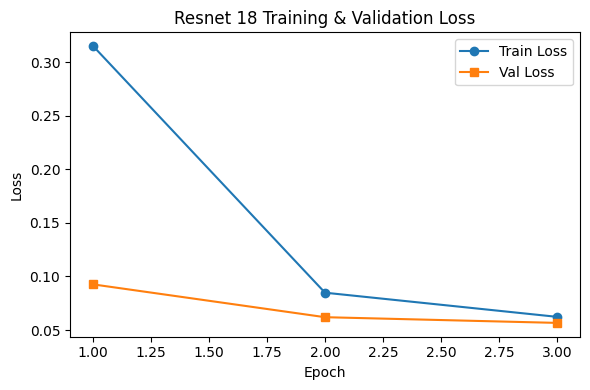


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9952,0.9905,0.9929,211.0
Tomato___Early_blight,1.0000,0.8889,0.9412,99.0
Tomato___Late_blight,0.9787,0.9735,0.9761,189.0
Tomato___Leaf_Mold,0.9900,1.0000,0.9950,99.0
Tomato___Septoria_leaf_spot,0.9943,0.9943,0.9943,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9762,0.9880,0.9820,166.0
Tomato___Target_Spot,0.9167,0.9496,0.9329,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9962,0.9925,0.9943,531.0
Tomato___Tomato_mosaic_virus,0.9802,1.0000,0.9900,99.0
Tomato___healthy,0.9630,0.9936,0.9781,157.0



✅ Genel Accuracy: 0.9823


<ipython-input-6-608913554>:188: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


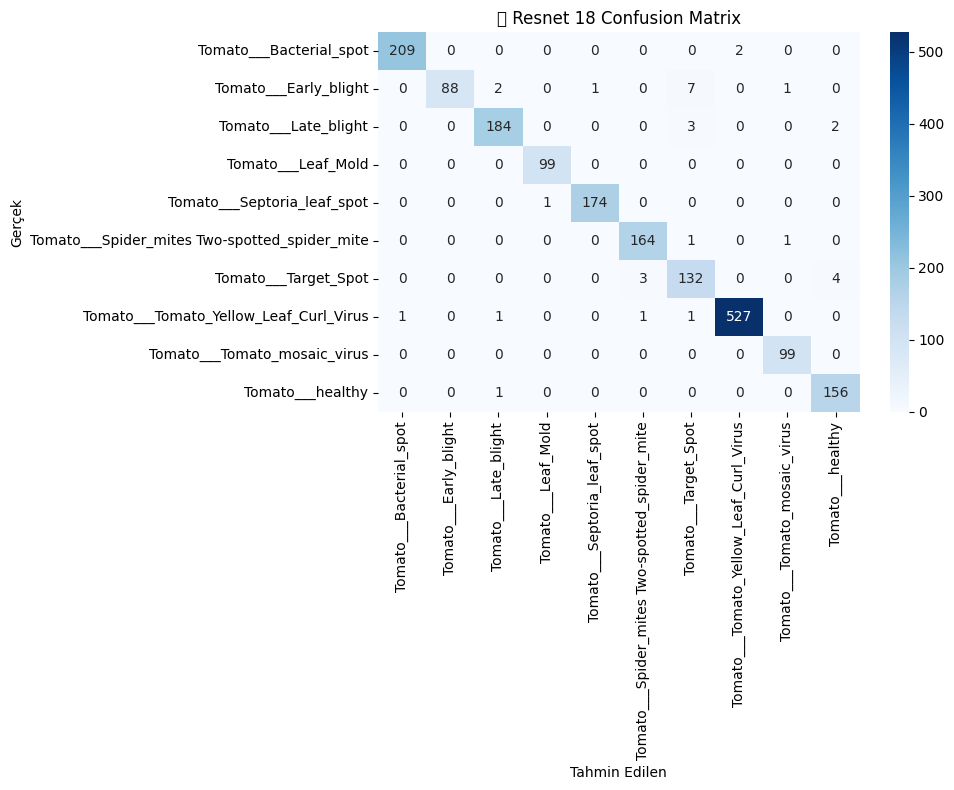

Epoch [1/3]  Train Loss: 0.3034  Val Loss: 0.0640  Time: 34.49s
Epoch [2/3]  Train Loss: 0.0899  Val Loss: 0.0647  Time: 34.41s
Epoch [3/3]  Train Loss: 0.0624  Val Loss: 0.0306  Time: 34.36s


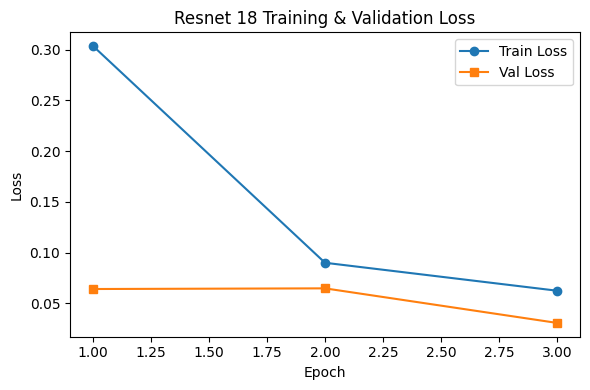


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9859,0.9953,0.9906,211.0
Tomato___Early_blight,1.0000,0.9899,0.9949,99.0
Tomato___Late_blight,1.0000,0.9894,0.9947,189.0
Tomato___Leaf_Mold,1.0000,1.0000,1.0000,99.0
Tomato___Septoria_leaf_spot,1.0000,1.0000,1.0000,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9939,0.9880,0.9909,166.0
Tomato___Target_Spot,0.9857,0.9928,0.9892,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9981,0.9962,0.9972,531.0
Tomato___Tomato_mosaic_virus,1.0000,1.0000,1.0000,99.0
Tomato___healthy,0.9874,1.0000,0.9937,157.0



✅ Genel Accuracy: 0.9952


<ipython-input-6-608913554>:188: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


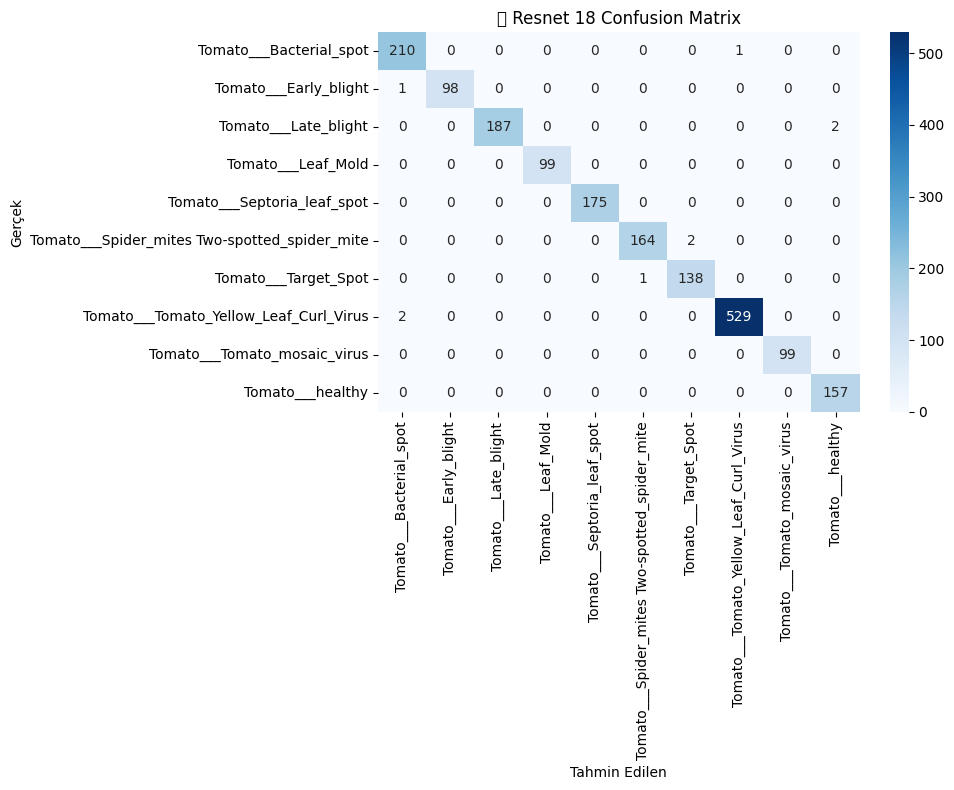

In [ ]:
important_channels_combined = [[np.int64(22), np.int64(35), np.int64(42), np.int64(44), np.int64(45), np.int64(46), np.int64(62), np.int64(66), np.int64(80), np.int64(82), np.int64(84), np.int64(85), np.int64(87), np.int64(88), np.int64(97), np.int64(148), np.int64(159), np.int64(190), np.int64(197), np.int64(210), np.int64(226), np.int64(229), np.int64(230), np.int64(253), np.int64(262), np.int64(263), np.int64(275), np.int64(293), np.int64(308), np.int64(324), np.int64(335), np.int64(365), np.int64(375), np.int64(394), np.int64(403), np.int64(435), np.int64(438), np.int64(442), np.int64(454), np.int64(455), np.int64(460), np.int64(471), np.int64(506)]]

for sayı in range(1,4):
  for i in important_channels_combined:

    # ResNet18 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
    # Ayarlar
    img_size = 224
    num_classes = 10
    augmented_dir = "/content/augmentation"
    validation_dir = "/content/without_augmentation"
    batch_size = 32
    test_ratio = 0.11
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Transform
    common_transforms = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Dataset yükle
    full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
    targets = [s[1] for s in full_dataset.samples]
    class_names = full_dataset.classes

    train_idx, test_idx = train_test_split(
        np.arange(len(full_dataset)),
        test_size=test_ratio,
        stratify=targets,
        random_state=42
    )

    train_dataset = Subset(full_dataset, train_idx)
    test_dataset = Subset(full_dataset, test_idx)
    val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

    # model1i oluştur
    model2 = timm.create_model("resnet34", pretrained=False, num_classes=num_classes)
    state_dict = torch.load("/content/drive/MyDrive/resnet_early_stop/standart/resnet34.pth", map_location=device)
    state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
    model2.load_state_dict(state_dict, strict=False)
    model2.to(device)

    # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
    selected_channels = i  # daha önce bulduğum 49 semantic kanal
    conv_layer = model2.layer4[-1].conv2  # resnet34'de conv3 yok, conv2 son katman

    # Kanal dışı olanları %100 prune et
    total_channels = conv_layer.out_channels
    mask = torch.zeros(total_channels, device=device)
    for ch in selected_channels:
        if ch < total_channels:
            mask[ch] = 1.0
    prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

    # Kayıp ve optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

    #early stop mekanizması
    class EarlyStopping:
        def __init__(self, patience=5, min_delta=0.001):
            self.patience = patience
            self.min_delta = min_delta
            self.counter = 0
            self.best_loss = None
            self.early_stop = False

        def __call__(self, val_loss):
            if self.best_loss is None:
                self.best_loss = val_loss
            elif self.best_loss - val_loss > self.min_delta:
                self.best_loss = val_loss
                self.counter = 0
            else:
                self.counter += 1
                if self.counter >= self.patience:
                    self.early_stop = True

    # Eğitim
    epochs = 3
    early_stopper = EarlyStopping(patience=5, min_delta=0.001)

    train_losses = []
    val_losses   = []

    for epoch in range(1, epochs+1):
        # -- Train --
        model2.train()
        running_train_loss = 0.0
        t0 = time.time()

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model2(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        avg_train_loss = running_train_loss / len(train_loader)

        # -- Validation --
        model2.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model2(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
        avg_val_loss = running_val_loss / len(test_loader)

        elapsed = time.time() - t0
        print(f"Epoch [{epoch}/{epochs}]"
              f"  Train Loss: {avg_train_loss:.4f}"
              f"  Val Loss: {avg_val_loss:.4f}"
              f"  Time: {elapsed:.2f}s")
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # --- Early Stopping kontrolü ---
        early_stopper(avg_val_loss)
        if early_stopper.early_stop:
           print(f"⏹️ Early stopping at epoch {epoch}")
           break

    # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
    plt.figure(figsize=(6,4))
    epochs_range = range(1, len(train_losses) + 1)
    plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
    plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Resnet 18 Training & Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Ağırlıkları kaydet
    #torch.save(model2.state_dict(), "resnet34_pruned.pth")

    # Değerlendirme
    model2.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model2(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    report = classification_report(
        all_labels,
        all_preds,
        target_names=class_names,
        output_dict=True
    )

    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.round(4)

    if 'accuracy' in report_df.index:
        accuracy_row = report_df.loc[['accuracy']]
        report_df = report_df.drop(index='accuracy')

    # Son tabloyu göster
    print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
    display(report_df)

    print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")

    cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title('📉 Resnet 18 Confusion Matrix')
    plt.tight_layout()
    plt.show()

bundan sonrası ana kod bloğu

Epoch [1/1000]  Train Loss: 0.4773  Val Loss: 0.1465  Time: 22.45s
Epoch [2/1000]  Train Loss: 0.1444  Val Loss: 0.0859  Time: 22.26s
Epoch [3/1000]  Train Loss: 0.1013  Val Loss: 0.0623  Time: 21.98s
Epoch [4/1000]  Train Loss: 0.0825  Val Loss: 0.0742  Time: 22.04s
Epoch [5/1000]  Train Loss: 0.0666  Val Loss: 0.0645  Time: 22.22s
Epoch [6/1000]  Train Loss: 0.0594  Val Loss: 0.0577  Time: 22.19s
Epoch [7/1000]  Train Loss: 0.0530  Val Loss: 0.0396  Time: 22.16s
Epoch [8/1000]  Train Loss: 0.0458  Val Loss: 0.0593  Time: 22.11s
Epoch [9/1000]  Train Loss: 0.0384  Val Loss: 0.0506  Time: 22.08s
Epoch [10/1000]  Train Loss: 0.0390  Val Loss: 0.0640  Time: 22.10s
Epoch [11/1000]  Train Loss: 0.0372  Val Loss: 0.0298  Time: 22.12s
Epoch [12/1000]  Train Loss: 0.0367  Val Loss: 0.0425  Time: 22.14s
Epoch [13/1000]  Train Loss: 0.0275  Val Loss: 0.0327  Time: 22.15s
Epoch [14/1000]  Train Loss: 0.0313  Val Loss: 0.0394  Time: 22.10s
Epoch [15/1000]  Train Loss: 0.0264  Val Loss: 0.0356  Ti

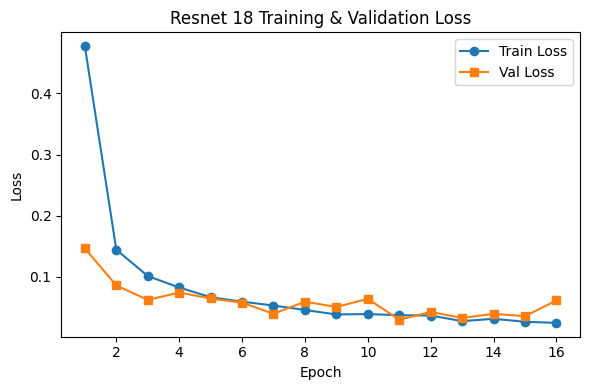


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,1.0000,0.9810,0.9904,211.0
Tomato___Early_blight,0.9083,1.0000,0.9519,99.0
Tomato___Late_blight,0.9789,0.9841,0.9815,189.0
Tomato___Leaf_Mold,1.0000,0.9899,0.9949,99.0
Tomato___Septoria_leaf_spot,0.9882,0.9543,0.9709,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9056,0.9819,0.9422,166.0
Tomato___Target_Spot,0.9524,0.8633,0.9057,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.0000,0.9944,0.9972,531.0
Tomato___Tomato_mosaic_virus,0.9706,1.0000,0.9851,99.0
Tomato___healthy,0.9936,0.9873,0.9904,157.0



✅ Genel Accuracy: 0.9769
Epoch [1/1000]  Train Loss: 0.3284  Val Loss: 0.0917  Time: 34.25s
Epoch [2/1000]  Train Loss: 0.0939  Val Loss: 0.0689  Time: 34.24s
Epoch [3/1000]  Train Loss: 0.0642  Val Loss: 0.0336  Time: 34.32s
Epoch [4/1000]  Train Loss: 0.0500  Val Loss: 0.0388  Time: 34.40s
Epoch [5/1000]  Train Loss: 0.0459  Val Loss: 0.0506  Time: 34.22s
Epoch [6/1000]  Train Loss: 0.0416  Val Loss: 0.0381  Time: 34.27s
Epoch [7/1000]  Train Loss: 0.0360  Val Loss: 0.0267  Time: 34.26s
Epoch [8/1000]  Train Loss: 0.0380  Val Loss: 0.0898  Time: 34.19s
Epoch [9/1000]  Train Loss: 0.0255  Val Loss: 0.0531  Time: 34.32s
Epoch [10/1000]  Train Loss: 0.0293  Val Loss: 0.0291  Time: 34.25s
Epoch [11/1000]  Train Loss: 0.0262  Val Loss: 0.0303  Time: 34.29s
Epoch [12/1000]  Train Loss: 0.0264  Val Loss: 0.0513  Time: 34.26s
⏹️ Early stopping at epoch 12


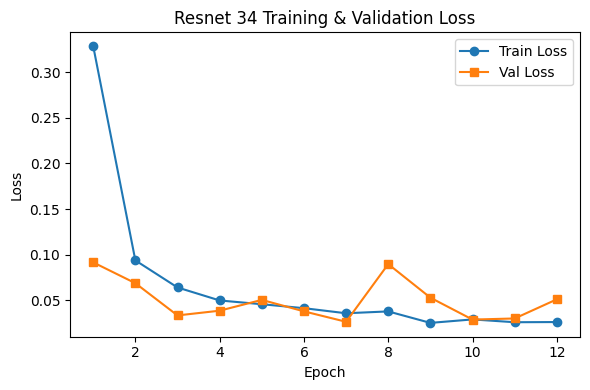


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,0.9904,0.9763,0.9833,211.0
Tomato___Early_blight,0.9083,1.0000,0.9519,99.0
Tomato___Late_blight,1.0000,0.9735,0.9866,189.0
Tomato___Leaf_Mold,1.0000,0.9495,0.9741,99.0
Tomato___Septoria_leaf_spot,0.9777,1.0000,0.9887,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.9483,0.9940,0.9706,166.0
Tomato___Target_Spot,0.9692,0.9065,0.9368,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1.0000,0.9981,0.9991,531.0
Tomato___Tomato_mosaic_virus,0.9899,0.9899,0.9899,99.0
Tomato___healthy,0.9937,1.0000,0.9968,157.0



✅ Genel Accuracy: 0.9834
Epoch [1/1000]  Train Loss: 0.2160  Val Loss: 0.0409  Time: 71.57s
Epoch [2/1000]  Train Loss: 0.0632  Val Loss: 0.0287  Time: 71.57s
Epoch [3/1000]  Train Loss: 0.0480  Val Loss: 0.0318  Time: 71.55s
Epoch [4/1000]  Train Loss: 0.0400  Val Loss: 0.0287  Time: 71.56s
Epoch [5/1000]  Train Loss: 0.0286  Val Loss: 0.0284  Time: 71.57s
Epoch [6/1000]  Train Loss: 0.0293  Val Loss: 0.0586  Time: 71.59s
Epoch [7/1000]  Train Loss: 0.0307  Val Loss: 0.1014  Time: 71.58s
⏹️ Early stopping at epoch 7


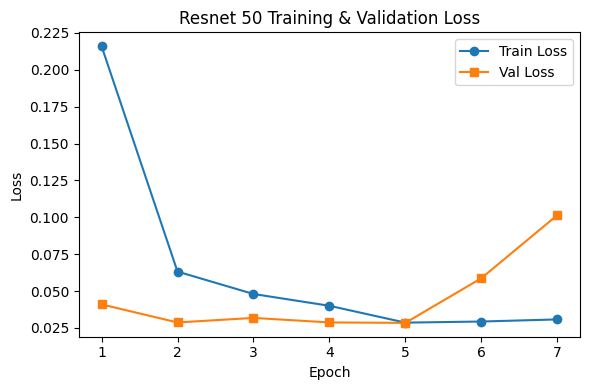


📊 Sınıflandırma Raporu (Tablo Formatında):


,precision,recall,f1-score,support
Tomato___Bacterial_spot,1.0000,1.0000,1.0000,211.0
Tomato___Early_blight,0.9417,0.9798,0.9604,99.0
Tomato___Late_blight,0.9943,0.9206,0.9560,189.0
Tomato___Leaf_Mold,1.0000,0.9293,0.9634,99.0
Tomato___Septoria_leaf_spot,1.0000,0.9943,0.9971,175.0
Tomato___Spider_mites Two-spotted_spider_mite,0.8098,1.0000,0.8949,166.0
Tomato___Target_Spot,0.9781,0.9640,0.9710,139.0
Tomato___Tomato_Yellow_Leaf_Curl_Virus,0.9961,0.9605,0.9779,531.0
Tomato___Tomato_mosaic_virus,0.9898,0.9798,0.9848,99.0
Tomato___healthy,0.9747,0.9809,0.9778,157.0



✅ Genel Accuracy: 0.9700
📊 Evaluating ResNet18...
📊 Evaluating ResNet34...
📊 Evaluating ResNet50...

📈 Karşılaştırmalı Sınıflandırma Performansı:


,Model,Precision,Recall,F1-Score,Accuracy
0,ResNet18,0.9778,0.9769,0.9769,0.9769
1,ResNet34,0.9840,0.9834,0.9834,0.9834
2,ResNet50,0.9740,0.9700,0.9708,0.9700


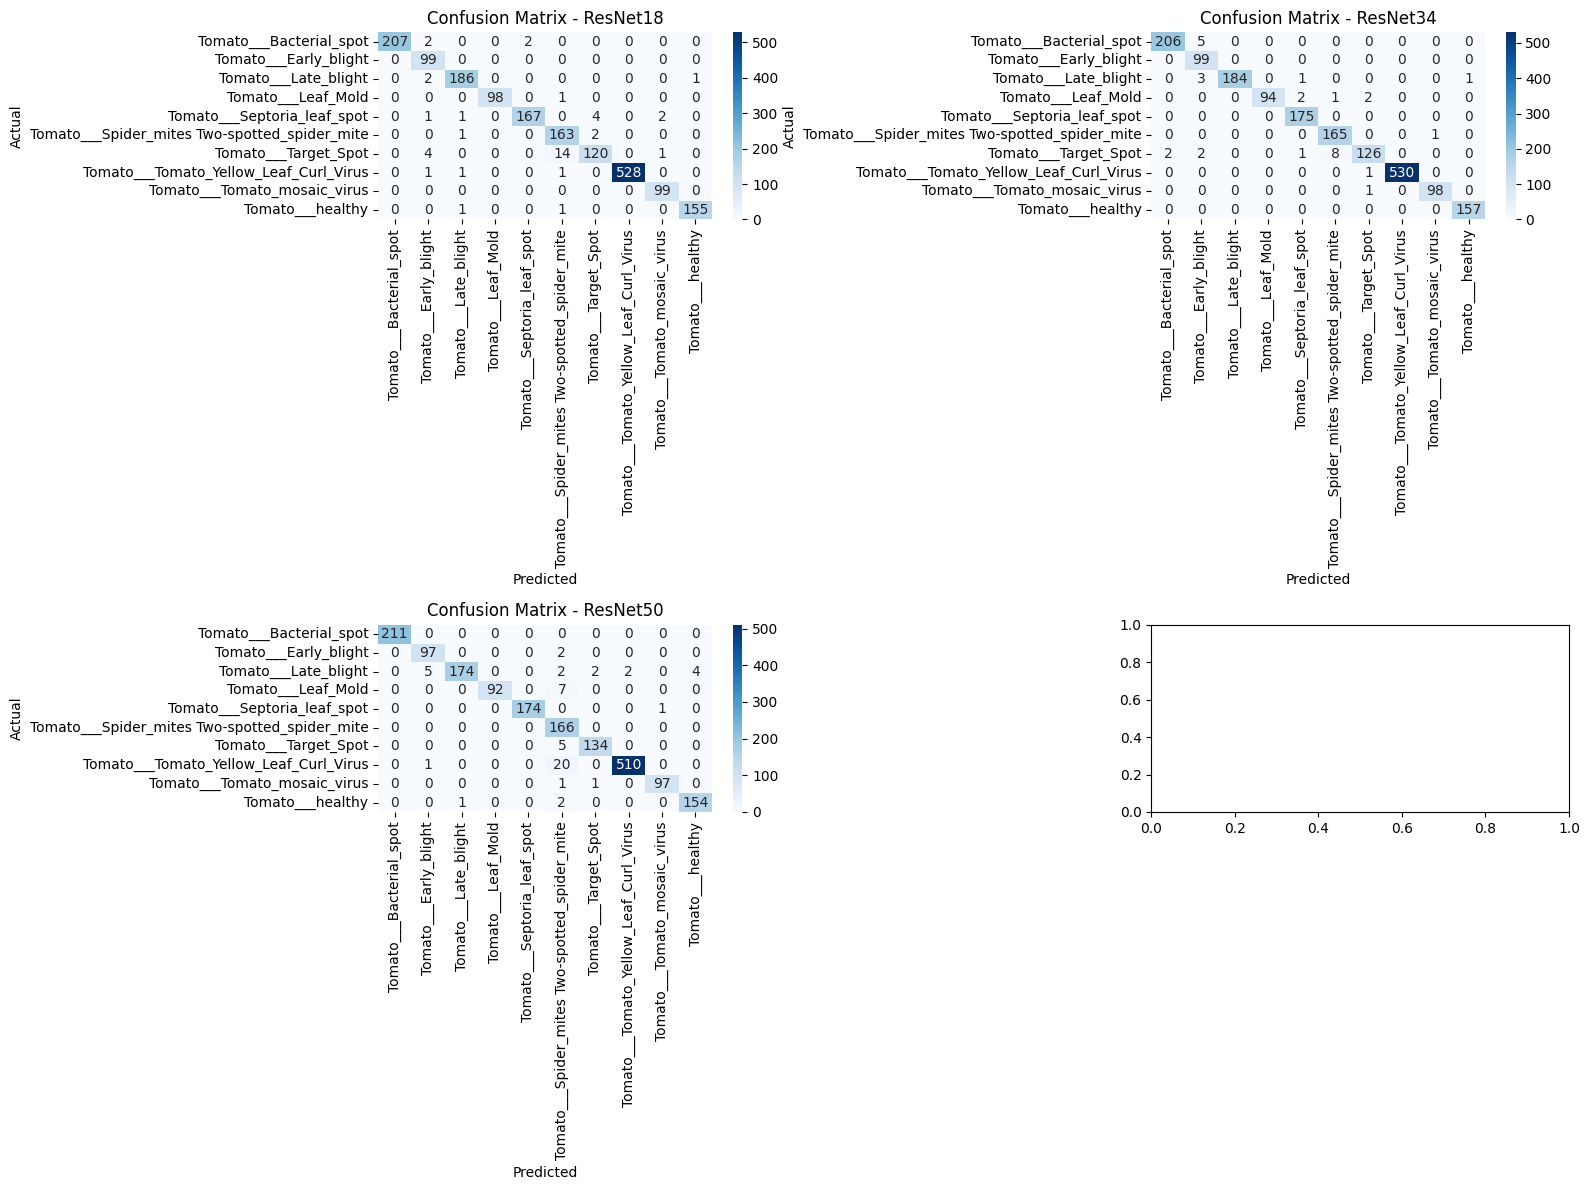

In [ ]:
#models_path_list = ["/content/drive/MyDrive/resnet_25_epoch/resnet18.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet34.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet50.pth", "/content/drive/MyDrive/resnet_25_epoch/resnet101.pth"]
#models_name_list = ["resnet18", "resnet34", "resnet50", "resnet101"]

for i in important_channels_combined:

  # ResNet18 Eğitimi: Pruning ile Seçilen Semantic Kanallarla
  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

  # model1i oluştur
  model1 = timm.create_model("resnet18", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_early_stop/standart/resnet18.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model1.load_state_dict(state_dict, strict=False)
  model1.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum 49 semantic kanal
  conv_layer = model1.layer4[-1].conv2  # resnet18'de conv3 yok, conv2 son katman

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model1.parameters(), lr=1e-4)

  #early stop mekanizması
  class EarlyStopping:
      def __init__(self, patience=5, min_delta=0.001):
          self.patience = patience
          self.min_delta = min_delta
          self.counter = 0
          self.best_loss = None
          self.early_stop = False

      def __call__(self, val_loss):
          if self.best_loss is None:
              self.best_loss = val_loss
          elif self.best_loss - val_loss > self.min_delta:
              self.best_loss = val_loss
              self.counter = 0
          else:
              self.counter += 1
              if self.counter >= self.patience:
                  self.early_stop = True

  # Eğitim
  epochs = 1000
  early_stopper = EarlyStopping(patience=5, min_delta=0.001)

  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model1.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model1(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model1.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model1(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)

      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

      # --- Early Stopping kontrolü ---
      early_stopper(avg_val_loss)
      if early_stopper.early_stop:
         print(f"⏹️ Early stopping at epoch {epoch}")
         break

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, len(train_losses) + 1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 18 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model1.state_dict(), "resnet18_pruned.pth")

  # Değerlendirme
  model1.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model1(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 18 Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''
  # ResNet34 Eğitimi: Pruning ile Seçilen Semantic Kanallarla

  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)


  # model2i oluştur
  model2 = timm.create_model("resnet34", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_early_stop/standart/resnet34.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model2.load_state_dict(state_dict, strict=False)
  model2.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum semantic kanallar
  conv_layer = model2.layer4[-1].conv2  # resnet34'de conv3 yok, conv2 son katman

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model2.parameters(), lr=1e-4)

  # Eğitim
  #epochs = 1000
  early_stopper = EarlyStopping(patience=5, min_delta=0.001)
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model2.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model2(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model2.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model2(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)
      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

      # --- Early Stopping kontrolü ---
      early_stopper(avg_val_loss)
      if early_stopper.early_stop:
         print(f"⏹️ Early stopping at epoch {epoch}")
         break

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, len(train_losses) + 1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 34 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model2.state_dict(), "resnet34_pruned.pth")

  # Değerlendirme
  model2.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model2(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 34 pruned Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''
  # ResNet50 Eğitimi: Pruning ile Seçilen Semantic Kanallarla

  # Ayarlar
  img_size = 224
  num_classes = 10
  augmented_dir = "/content/augmentation"
  validation_dir = "/content/without_augmentation"
  batch_size = 32
  test_ratio = 0.11
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  # Transform
  common_transforms = transforms.Compose([
      transforms.Resize((img_size, img_size)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  ])

  # Dataset yükle
  full_dataset = datasets.ImageFolder(augmented_dir, transform=common_transforms)
  targets = [s[1] for s in full_dataset.samples]
  class_names = full_dataset.classes

  train_idx, test_idx = train_test_split(
      np.arange(len(full_dataset)),
      test_size=test_ratio,
      stratify=targets,
      random_state=42
  )

  train_dataset = Subset(full_dataset, train_idx)
  test_dataset = Subset(full_dataset, test_idx)
  val_dataset = datasets.ImageFolder(validation_dir, transform=common_transforms)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)


  # model3ü oluştur
  model3 = timm.create_model("resnet50", pretrained=False, num_classes=num_classes)
  state_dict = torch.load("/content/drive/MyDrive/resnet_early_stop/standart/resnet50.pth", map_location=device)
  state_dict = {k: v for k, v in state_dict.items() if not k.startswith("fc.")}
  model3.load_state_dict(state_dict, strict=False)
  model3.to(device)

  # 🔧 Pruning uygulamak için: semantic kanal dışındakileri sıfırla
  selected_channels = i  # daha önce bulduğum 49 semantic kanal
  conv_layer = model3.layer4[-1].conv3

  # Kanal dışı olanları %100 prune et
  total_channels = conv_layer.out_channels
  mask = torch.zeros(total_channels, device=device)
  for ch in selected_channels:
      if ch < total_channels:
          mask[ch] = 1.0
  prune.CustomFromMask.apply(conv_layer, "weight", mask[:, None, None, None].expand_as(conv_layer.weight))

  # Kayıp ve optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model3.parameters(), lr=1e-4)

  # Eğitim
  #epochs = 1000
  early_stopper = EarlyStopping(patience=5, min_delta=0.001)
  train_losses = []
  val_losses   = []

  for epoch in range(1, epochs+1):
      # -- Train --
      model3.train()
      running_train_loss = 0.0
      t0 = time.time()

      for images, labels in train_loader:
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model3(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_train_loss += loss.item()
      avg_train_loss = running_train_loss / len(train_loader)

      # -- Validation --
      model3.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for images, labels in test_loader:
              images, labels = images.to(device), labels.to(device)
              outputs = model3(images)
              loss = criterion(outputs, labels)
              running_val_loss += loss.item()
      avg_val_loss = running_val_loss / len(test_loader)
      elapsed = time.time() - t0
      print(f"Epoch [{epoch}/{epochs}]"
            f"  Train Loss: {avg_train_loss:.4f}"
            f"  Val Loss: {avg_val_loss:.4f}"
            f"  Time: {elapsed:.2f}s")
      train_losses.append(avg_train_loss)
      val_losses.append(avg_val_loss)

      # --- Early Stopping kontrolü ---
      early_stopper(avg_val_loss)
      if early_stopper.early_stop:
         print(f"⏹️ Early stopping at epoch {epoch}")
         break

  # --- Eğitim bittikten sonra Loss eğrilerini çiz ---
  plt.figure(figsize=(6,4))
  epochs_range = range(1, len(train_losses) + 1)
  plt.plot(epochs_range, train_losses, marker='o', label='Train Loss')
  plt.plot(epochs_range, val_losses,   marker='s', label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Resnet 50 Training & Validation Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

  # Ağırlıkları kaydet
  torch.save(model3.state_dict(), "resnet50_pruned.pth")

  # Değerlendirme
  model3.eval()
  all_preds, all_labels = [], []

  with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          outputs = model3(images)
          _, preds = torch.max(outputs, 1)
          all_preds.extend(preds.cpu().numpy())
          all_labels.extend(labels.numpy())

  report = classification_report(
      all_labels,
      all_preds,
      target_names=class_names,
      output_dict=True
  )

  report_df = pd.DataFrame(report).transpose()
  report_df = report_df.round(4)

  if 'accuracy' in report_df.index:
      accuracy_row = report_df.loc[['accuracy']]
      report_df = report_df.drop(index='accuracy')

  # Son tabloyu göster
  print("\n📊 Sınıflandırma Raporu (Tablo Formatında):")
  display(report_df)

  print(f"\n✅ Genel Accuracy: {report['accuracy']:.4f}")
  '''
  cm = confusion_matrix(all_labels, all_preds, labels=range(num_classes))
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Tahmin Edilen')
  plt.ylabel('Gerçek')
  plt.title('📉 Resnet 50 Confusion Matrix')
  plt.tight_layout()
  plt.show()
  '''

# evaluate kısmı, tüm modeller tek tek inceleniyor
  def evaluate_model(model, dataloader, class_names, device):
      model.eval()
      all_preds, all_labels = [], []

      with torch.no_grad():
          for images, labels in dataloader:
              images = images.to(device)
              outputs = model(images)
              _, preds = torch.max(outputs, 1)
              all_preds.extend(preds.cpu().numpy())
              all_labels.extend(labels.numpy())
      report = classification_report(
          all_labels, all_preds,
          target_names=class_names,
          output_dict=True
      )

      cm = confusion_matrix(all_labels, all_preds, labels=range(len(class_names)))
      return report, cm

      # Değerlendirmeyi yapacağımız modeller
  models = {
      "ResNet18": model1,
      "ResNet34": model2,
      "ResNet50": model3
  }

  reports = {}
  conf_matrices = {}

  for name, model in models.items():
      print(f"📊 Evaluating {name}...")
      report, cm = evaluate_model(model, test_loader, class_names, device)
      reports[name] = report
      conf_matrices[name] = cm

      # Her model için weighted avg (veya macro avg) precision, recall, f1-score değerlerini toplayalım
  summary_data = []

  for name, report in reports.items():
      row = {
          "Model": name,
          "Precision": report["weighted avg"]["precision"],
          "Recall": report["weighted avg"]["recall"],
          "F1-Score": report["weighted avg"]["f1-score"],
          "Accuracy": report["accuracy"]
      }
      summary_data.append(row)
  summary_df = pd.DataFrame(summary_data)
  summary_df = summary_df.round(4)
  print("\n📈 Karşılaştırmalı Sınıflandırma Performansı:")
  display(summary_df)

  fig, axes = plt.subplots(2, 2, figsize=(16, 12))
  axes = axes.flatten()

  for idx, (name, cm) in enumerate(conf_matrices.items()):
      ax = axes[idx]
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=class_names,
                  yticklabels=class_names,
                  ax=ax)
      ax.set_title(f"Confusion Matrix - {name}")
      ax.set_xlabel('Predicted')
      ax.set_ylabel('Actual')

  plt.tight_layout()
  plt.show()

  # --- Döngü sonunda bellek temizliği ---
  del model1, model2, model3
  del train_loader, test_loader, val_loader
  gc.collect()
  torch.cuda.empty_cache()
  torch.cuda.ipc_collect()